# Support Vector Machine
A Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used for classification, regression, and outlier detection tasks. It works by finding the optimal hyperplane that best separates the different classes in the feature space.
1. In support vector machine we train a mathematical function to split data
2. A line is projected
3. Then the nearest datapoint to the line is taken for both the types of dataset
4. A parallel line with the line projected is drawn from both the dataset
5. The distance between the projected line and the line of the data point is called the margin
6. Margin is the free space between the points
7. The optimal model would be the one with the largest margin between the two classes
8. When data is very cluttered Kernel comes into play
9. The data points are lifted where a new hyperplane is made. Here a new dimension is added with the help of kernel function (2D -> 3D)
10. SVM doesnt work well with outliers


In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles

In [29]:
df = load_breast_cancer()

In [30]:
df

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [31]:
X = df.data
y = df.target

In [32]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [33]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [35]:
clf = SVC(kernel='linear', C=3)
clf.fit(X_train,y_train)

SVC(C=3, kernel='linear')

In [36]:
clf.score(X_test,y_test)

0.956140350877193

In [37]:
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
clf2.score(X_test,y_test)

0.9210526315789473

In [39]:
X, y =  make_circles(n_samples=1000, noise=0.2, factor=0.15)

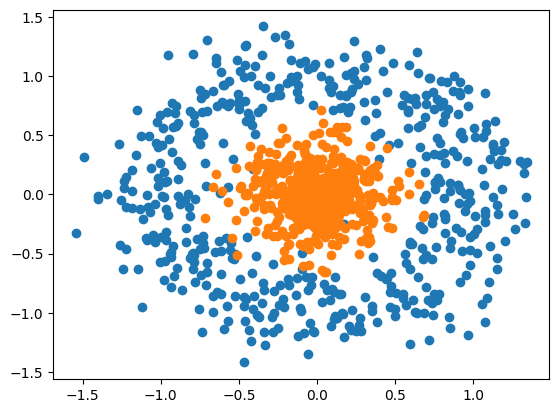

In [40]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()


In [41]:
lin_svc = LinearSVC()


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


/Users/asheshlalshrestha/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


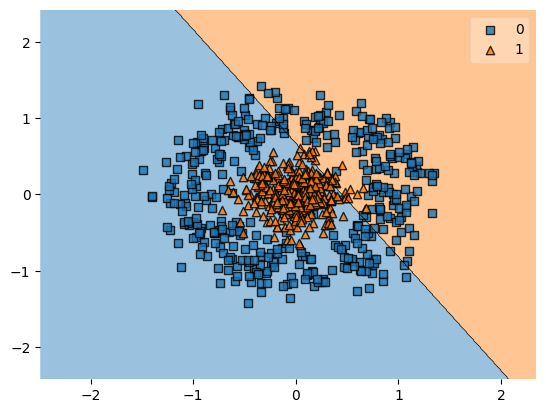

In [43]:
lin_svc.fit(X_train, y_train)

plot_decision_regions(X_train, y_train, lin_svc)
plt.show()

In [44]:
y_pred = lin_svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.29

In [45]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[51 45]
 [97  7]]
              precision    recall  f1-score   support

           0       0.34      0.53      0.42        96
           1       0.13      0.07      0.09       104

    accuracy                           0.29       200
   macro avg       0.24      0.30      0.25       200
weighted avg       0.24      0.29      0.25       200



## Using Kernel Functions
## Degree 2 ploynomial kernel


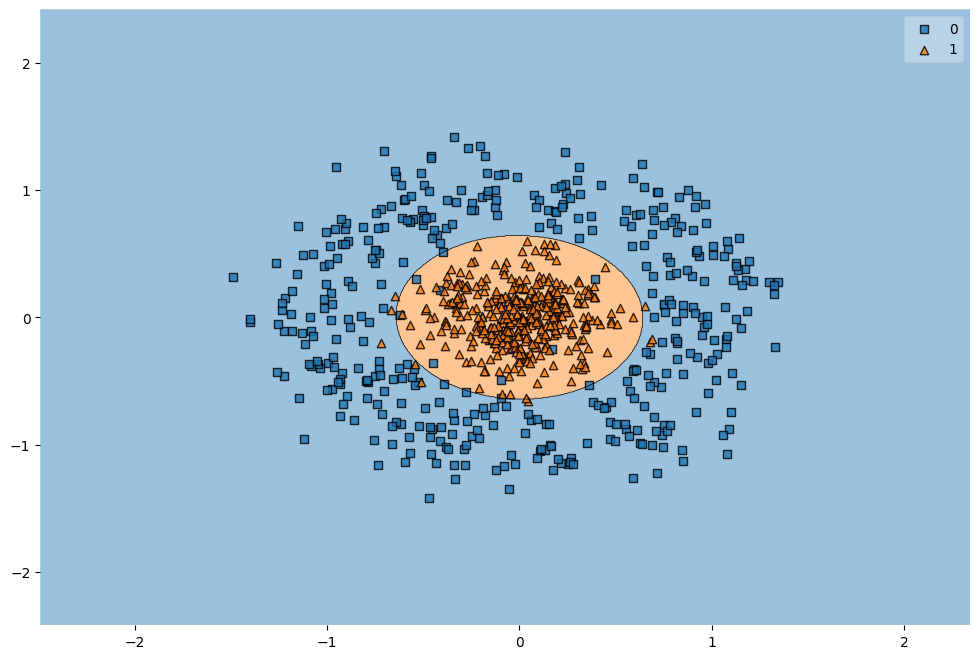

In [46]:
svc = SVC(kernel="poly", degree=2)

svc.fit(X_train, y_train)
plt.figure(figsize=(12,8))
plot_decision_regions(X_train, y_train, svc)
plt.show()


In [47]:
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.975

In [48]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 93   3]
 [  2 102]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        96
           1       0.97      0.98      0.98       104

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

